In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\saran\\OneDrive\\Desktop\\practice\\titanic\\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

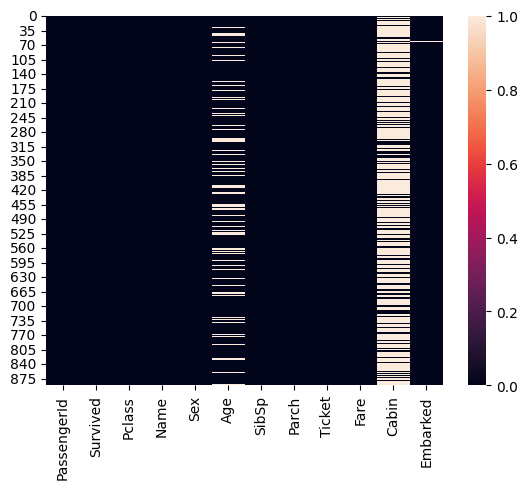

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# handling missing value using drop all the rows
df.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [7]:
df.dropna(axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [8]:
df.dropna().count()

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

In [9]:
df.dropna(axis=1).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [10]:
# handle missing value using mean/mode/medium value imputation
df1=df.copy()
df1["Age"].fillna(df["Age"].mean,inplace=True)

In [11]:
df1["Age"].isnull().sum()

0

In [12]:
# imbalance dataset handling
# upsampling
# downsampling

In [13]:
class_0=pd.DataFrame({
    "feature_1":np.random.normal(loc=0,scale=1,size=900),
    "feature_2":np.random.normal(loc=0,scale=1,size=900),
    "target":[0]*900
})
class_1=pd.DataFrame({
    "feature_1":np.random.normal(loc=2,scale=1,size=100),
    "feature_2":np.random.normal(loc=2,scale=1,size=100),
    "target":[1]*100
})

In [14]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [15]:
df

,feature_1,feature_2,target
0,0.624043,-0.182180,0
1,0.819806,-0.056285,0
2,0.277396,0.444071,0
3,1.188612,-1.070212,0
4,0.093733,0.153610,0
...,...,...,...
995,1.648309,2.880707,1
996,1.088668,2.318311,1
997,2.244012,2.172955,1
998,0.912366,1.498035,1


In [16]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [17]:
# Upsampling


In [18]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [19]:
from sklearn.utils import resample

In [20]:
df_minority_upsample=resample(df_minority,
                              replace=True,
                              n_samples=len(df_majority),
                              random_state=42)

In [21]:
df_minority_upsample.shape

(900, 3)

In [22]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

In [23]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [24]:
# Downsampling

In [25]:
df_majority_downsample=resample(df_majority,
                                replace=False,
                                n_samples=len(df_minority),
                                random_state=42)

In [26]:
df_downsampled=pd.concat([df_minority,df_majority_downsample])

In [27]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [28]:
# SMOTE(synthtiv minority oversampling technque) for up sampling

In [29]:
from sklearn.datasets import make_classification

In [30]:
x,y=make_classification(n_samples=1000,
                    n_features=2,
                    n_clusters_per_class=2,
                    weights=[0.90],
                    random_state=1,
                    n_redundant=0)

In [31]:
x,y

(array([[-0.4950081 ,  1.3185973 ],
        [-0.53099717,  0.90118241],
        [ 0.98277596, -1.59111159],
        ...,
        [-1.82785947,  0.63882017],
        [-1.01084076,  0.42633933],
        [-1.00873243,  1.24540194]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [32]:
df1=pd.DataFrame(x,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])
df=pd.concat([df1,df2],axis=1)
df

,feature_1,feature_2,target
0,-0.495008,1.318597,0
1,-0.530997,0.901182,0
2,0.982776,-1.591112,0
3,-1.032039,-0.801162,0
4,-2.878650,3.017104,0
...,...,...,...
995,-2.171441,1.513745,0
996,1.425043,-0.236500,1
997,-1.827859,0.638820,0
998,-1.010841,0.426339,0


In [33]:
df.target.value_counts()

target
0    893
1    107
Name: count, dtype: int64

<Axes: >

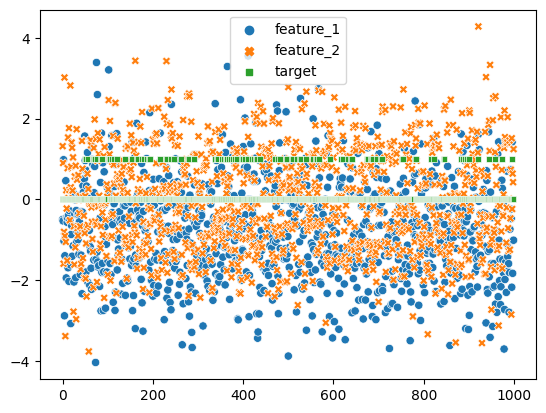

In [34]:
sns.scatterplot(data=df)

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
oversample=SMOTE()
x,y=oversample.fit_resample(df[["feature_1","feature_2"]],df["target"])

In [37]:
df=pd.concat([x,y],axis=1)

In [38]:
df

,feature_1,feature_2,target
0,-0.495008,1.318597,0
1,-0.530997,0.901182,0
2,0.982776,-1.591112,0
3,-1.032039,-0.801162,0
4,-2.878650,3.017104,0
...,...,...,...
1781,1.111769,-1.310207,1
1782,0.131941,1.153991,1
1783,0.362882,-1.667577,1
1784,0.876475,-1.266566,1


In [39]:
df.target.value_counts()

target
0    893
1    893
Name: count, dtype: int64

<Axes: xlabel='feature_1', ylabel='feature_2'>

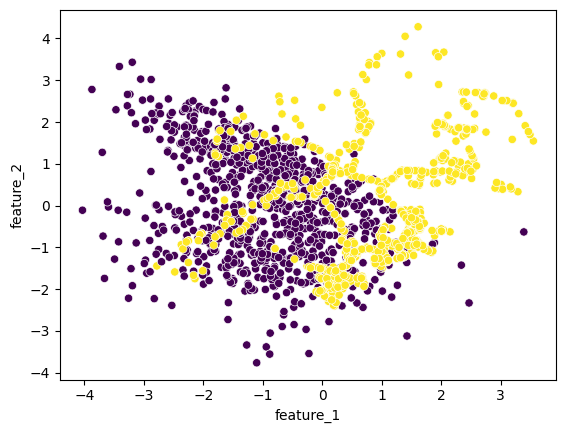

In [40]:
sns.scatterplot(x=df.feature_1,y=df.feature_2,c=df.target)

In [41]:
# Data interpolation (creating new data point with in that dataset)

In [42]:
# linear interpolation
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

<Axes: >

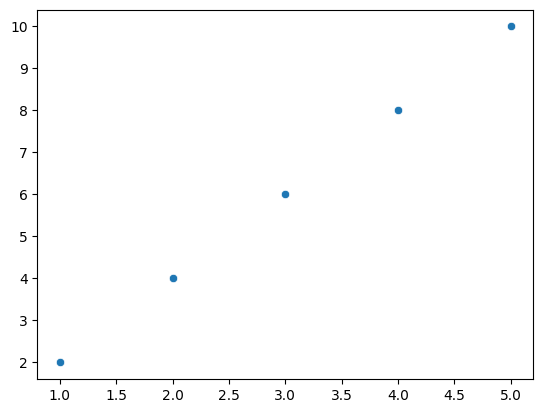

In [43]:
sns.scatterplot(x=x,y=y)

In [44]:
x_new=np.linspace(1,5,10)
y_new=np.interp(x_new,x,y)

<Axes: >

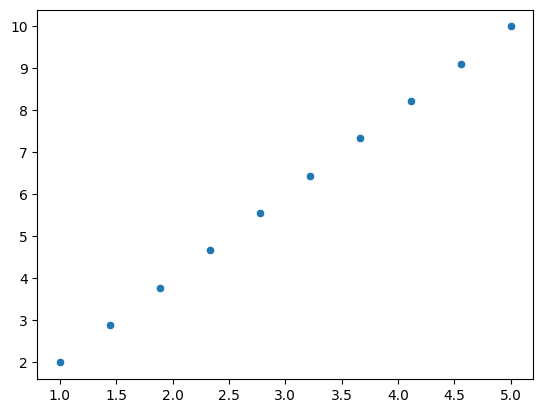

In [45]:
sns.scatterplot(x=x_new,y=y_new)

In [46]:
from scipy.interpolate import interp1d

In [47]:
y=[i**3 for i in x]

f=interp1d(x,y,kind="cubic")

In [48]:
x_new=np.linspace(1,5,10)
y_interp=f(x_new)

<Axes: >

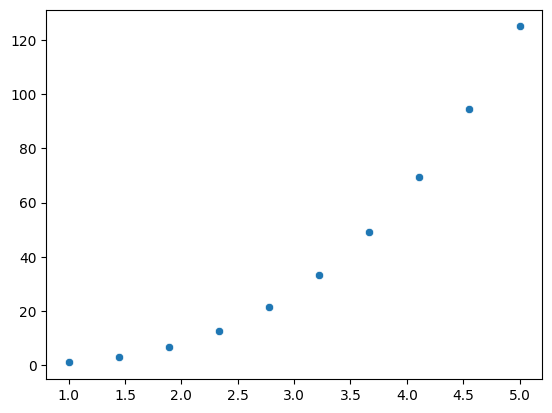

In [49]:
sns.scatterplot(x=x_new,y=y_interp)

In [50]:
# handling outliers
"""1) minimum value
   2) Q1 (25 percentile)
   3) Q2 (50 percentile or median)
   4) Q3 (75 percentile)
   5) maximum value"""

'1) minimum value\n   2) Q1 (25 percentile)\n   3) Q2 (50 percentile or median)\n   4) Q3 (75 percentile)\n   5) maximum value'

In [51]:
x=[10,20,30,40,50,60,70,1000,8000]

In [52]:
minimum,q1,q2,q3,maximum=np.percentile(x,[0,25,50,75,100])

In [53]:
# interquartile range
IQR=q3-q1
IQR

40.0

In [54]:
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [55]:
outlier=[]
for i in x:
    if not(i>=lower_fence and i<=upper_fence):
       outlier.append(i)       

In [56]:
outlier

[1000, 8000]

<Axes: >

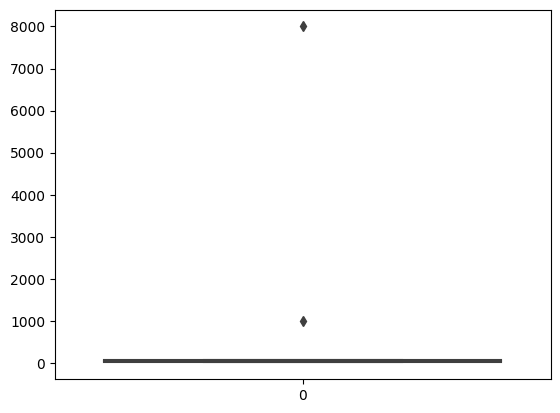

In [57]:
sns.boxplot(x)

In [58]:
# feature scaling
"""1) Standerisation
   2) min max scaling (normalisation)
   3) unit vector"""

'1) Standerisation\n   2) min max scaling (normalisation)\n   3) unit vector'

In [59]:
# standrisation ( using z-score)

In [60]:
df=pd.read_csv('C:\\Users\\saran\\OneDrive\\Desktop\\practice\\titanic\\test.csv')

In [61]:
df.dropna(inplace=True)

In [62]:
df.reset_index(drop=1,inplace=True)

In [63]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
1,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
2,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
3,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
4,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


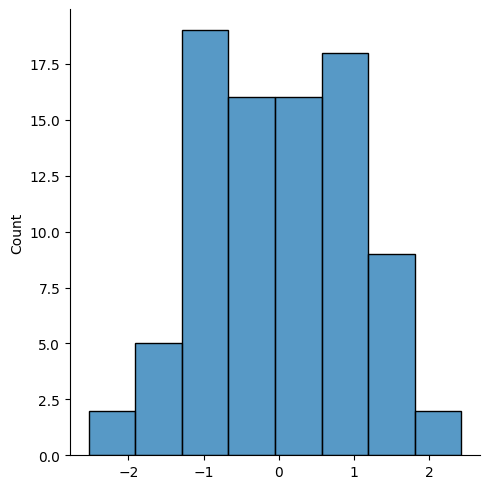

In [64]:
mean=np.mean(df.Age)
std=np.std(df.Age)
age=[]
for i in range(len(df)):
    z=(df.loc[i,"Age"]-mean)/std
    age.append(z)

sns.displot(x=age)

In [65]:
pd.DataFrame(age,columns=["age"])

,age
0,-1.073763
1,0.512383
2,0.578472
3,-1.139853
4,0.115846
...,...
82,0.248025
83,-1.272032
84,0.710651
85,-0.148511


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler=StandardScaler()

In [68]:
scaler.fit(df[["Age"]])

StandardScaler()

In [69]:
scaler.mean_

array([39.24712644])

In [70]:
pd.DataFrame(scaler.transform(df[["Age"]]),columns=["Age"])

,Age
0,-1.073763
1,0.512383
2,0.578472
3,-1.139853
4,0.115846
...,...
82,0.248025
83,-1.272032
84,0.710651
85,-0.148511


In [71]:
# normalisation (min max scaler)

In [72]:
max=df.Age.max()
min=df.Age.min()

In [73]:
new_data=[]
for i in range(len(df.Age)):
    x=(df["Age"].at[i]-min)/(max*min)
    new_data.append(x)
new_data    

[0.2894736842105263,
 0.6052631578947368,
 0.618421052631579,
 0.27631578947368424,
 0.5263157894736842,
 0.3815789473684211,
 0.5789473684210527,
 0.5789473684210527,
 0.7763157894736842,
 0.3026315789473684,
 0.35526315789473684,
 0.3157894736842105,
 0.4605263157894737,
 0.15789473684210525,
 0.39473684210526316,
 0.7763157894736842,
 0.3618421052631579,
 0.4473684210526316,
 0.4144736842105263,
 0.7105263157894737,
 0.868421052631579,
 0.34210526315789475,
 0.9868421052631579,
 0.5526315789473685,
 0.23026315789473684,
 0.4605263157894737,
 0.8157894736842105,
 0.0,
 0.4605263157894737,
 0.4473684210526316,
 0.6842105263157895,
 0.7894736842105263,
 0.2894736842105263,
 0.3684210526315789,
 0.5394736842105263,
 0.618421052631579,
 0.6973684210526315,
 0.4605263157894737,
 0.8289473684210527,
 0.47368421052631576,
 0.2236842105263158,
 0.34210526315789475,
 0.06578947368421052,
 0.6052631578947368,
 0.42105263157894735,
 0.5394736842105263,
 0.6447368421052632,
 0.27631578947368424,

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler=MinMaxScaler()

In [76]:
scaler.fit(df[["Age"]])

MinMaxScaler()

In [77]:
data=pd.DataFrame(scaler.transform(df[["Age"]]),columns=["Age"])

In [78]:
data

,Age
0,0.293333
1,0.613333
2,0.626667
3,0.280000
4,0.533333
...,...
82,0.560000
83,0.253333
84,0.653333
85,0.480000


In [79]:
# Unit vector

In [80]:
from sklearn.preprocessing import normalize

In [81]:
data=df["Age"]

In [82]:
normalize([data])

array([[0.05862318, 0.11979519, 0.12234403, 0.05607435, 0.10450219,
        0.07646502, 0.11469753, 0.11469753, 0.15293004, 0.06117201,
        0.07136735, 0.06372085, 0.09175802, 0.03313484, 0.07901385,
        0.15293004, 0.07264177, 0.08920919, 0.0828371 , 0.14018587,
        0.17077187, 0.06881852, 0.19371138, 0.10959986, 0.04715343,
        0.09175802, 0.16057654, 0.00254883, 0.09175802, 0.08920919,
        0.1350882 , 0.15547887, 0.05862318, 0.07391618, 0.10705102,
        0.12234403, 0.13763703, 0.09175802, 0.16312537, 0.09430686,
        0.04587901, 0.06881852, 0.015293  , 0.11979519, 0.08411152,
        0.10705102, 0.1274417 , 0.05607435, 0.09940452, 0.16312537,
        0.12234403, 0.11469753, 0.10450219, 0.06881852, 0.11724636,
        0.06626968, 0.06117201, 0.1350882 , 0.16312537, 0.07646502,
        0.14018587, 0.14018587, 0.14528353, 0.06372085, 0.06626968,
        0.03058601, 0.09940452, 0.07646502, 0.14783237, 0.11469753,
        0.1274417 , 0.1503812 , 0.06372085, 0.07

In [83]:
# data Encoding
# 1) nominal/OneHotEncoding
# 2) label/Ordinal encoding
# 3) target guided ordinal encoding

In [84]:
# nominal/OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

In [85]:
df=pd.DataFrame(["red","blue","green","green","blue","green","red"], columns=["colors"])
df

,colors
0,red
1,blue
2,green
3,green
4,blue
5,green
6,red


In [86]:
encoder=OneHotEncoder()

In [87]:
encoded=encoder.fit_transform(df[["colors"]])

In [88]:
encoded=pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())

In [89]:
pd.concat([df,encoded],axis=1)

,colors,colors_blue,colors_green,colors_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,blue,1.0,0.0,0.0
5,green,0.0,1.0,0.0
6,red,0.0,0.0,1.0


In [90]:
#level / ordinal encoding

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
df=pd.DataFrame(["red","blue","green","green","blue","green","red"], columns=["colors"])

In [93]:
encoder=LabelEncoder()

In [94]:
pd.encoder.fit_transform(df['colors'])

array([2, 0, 1, 1, 0, 1, 2])

In [95]:
from sklearn.preprocessing import OrdinalEncoder

In [98]:
df=pd.DataFrame(["small","medium","large","medium","small","large","small"], columns=["size"])

In [99]:
encoder=OrdinalEncoder(categories=[["small","medium","large"]])

In [100]:
encoder.fit_transform(df[["size"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.]])

In [101]:
#target guided ordinal encoading---------------------------------------------

In [102]:
df=pd.DataFrame({"city":["New York","London","paris","Tokyo","New York","paris"],
                 "price":[200,150,300,250,180,320]})

In [103]:
df

,city,price
0,New York,200
1,London,150
2,paris,300
3,Tokyo,250
4,New York,180
5,paris,320


In [107]:
# calculate th eman price for each city
mean_price=df.groupby("city")["price"].mean().to_dict()

In [108]:
# replace each city with its mean price
df["city_encoded"]=df["city"].map(mean_price)

In [109]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,paris,320,310.0


In [111]:
# covariance
df.cov(numeric_only=1)

,price,city_encoded
price,4626.666667,4546.666667
city_encoded,4546.666667,4546.666667


In [114]:
# pearson correlation 
df.corr(method="pearson",numeric_only=1)

,price,city_encoded
price,1.000000,0.991317
city_encoded,0.991317,1.000000
